In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

In [2]:
data = pd.read_csv('../../output/data/Casen2022.csv')
data

,sexo,edad,edad_tr,sexo_edad,educa,region,ingreso,prom_ing_educa,prom_ing_educa_sexo_edad,prom_ing_educa_sexo_edad_region,prom_ing_region,prom_ing_sexo_edad_region,prom_ing_educa_region,prom_ing_sexo_edad,prom_ing_sexo_educa
0,Hombre,64,Adultos,Hombre adulto,Educación Basica,Región de Ñuble,580000.0,395318,441676,398645,516164,560430,357005,778863,433919
1,Hombre,34,Jovenes,Hombre joven,Educación Media,Región de Ñuble,520000.0,493138,516871,468280,516164,525656,439522,668422,553423
2,Mujer,30,Jovenes,Mujer joven,Educación Media,Región de Ñuble,450000.0,493138,393702,340421,516164,496131,439522,583213,405642
3,Mujer,68,Adultos mayores,Mujer mayor,Educación Media,Región de Ñuble,160000.0,493138,390848,273333,516164,297894,439522,505509,405642
4,Mujer,56,Adultos,Mujer adulta,Educación Basica,Región de Ñuble,500000.0,395318,327913,283931,516164,473686,357005,608391,323454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59639,Hombre,28,Jovenes,Hombre joven,Otro nivel educativo,Región de Valparaíso,1300000.0,589902,595908,470907,611597,607931,508767,668422,643764
59640,Mujer,47,Adultos,Mujer adulta,Universitaria completa,Región de La Araucanía,1200000.0,1146090,1168781,971383,529377,507012,928444,608391,1001133
59641,Mujer,41,Adultos,Mujer adulta,Universitaria completa,Región de La Araucanía,1400000.0,1146090,1168781,971383,529377,507012,928444,608391,1001133
59642,Hombre,46,Adultos,Hombre adulto,Universitaria completa,Región de La Araucanía,2000000.0,1146090,1613400,1198900,529377,573294,928444,778863,1323762


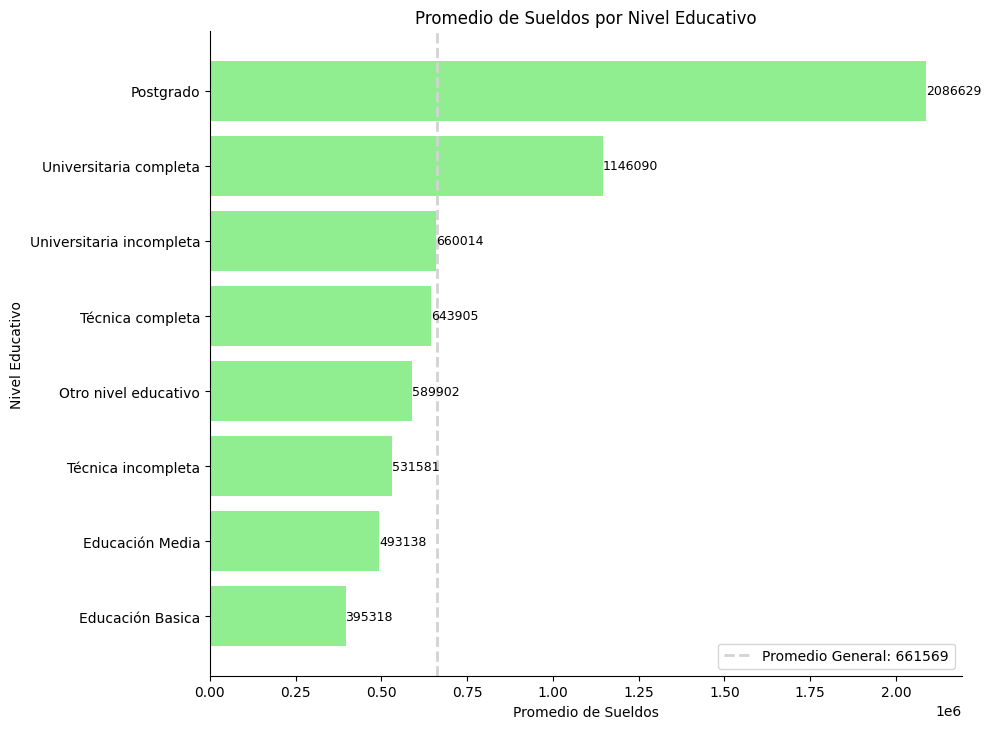

In [3]:
tabla = data.drop_duplicates(subset=['prom_ing_educa', 'educa'])
tabla = tabla.sort_values(by='prom_ing_educa', ascending=False)
prom = data['ingreso'].mean()

plt.figure(figsize=(10, 7.4))

plt.barh(tabla['educa'], tabla['prom_ing_educa'], color='skyblue')
bars = plt.barh(tabla['educa'], tabla['prom_ing_educa'], color='lightgreen')

for bar, value in zip(bars, tabla['prom_ing_educa']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
             va='center', ha='left', fontsize=9, color='black')
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.axvline(x=prom, color='lightgray', linestyle='--', linewidth=2, label=f'Promedio General: {prom:.0f}')

plt.xlabel('Promedio de Sueldos')
plt.ylabel('Nivel Educativo')
plt.title('Promedio de Sueldos por Nivel Educativo')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('../output/fig/PromIngEduca.pdf')
plt.show()

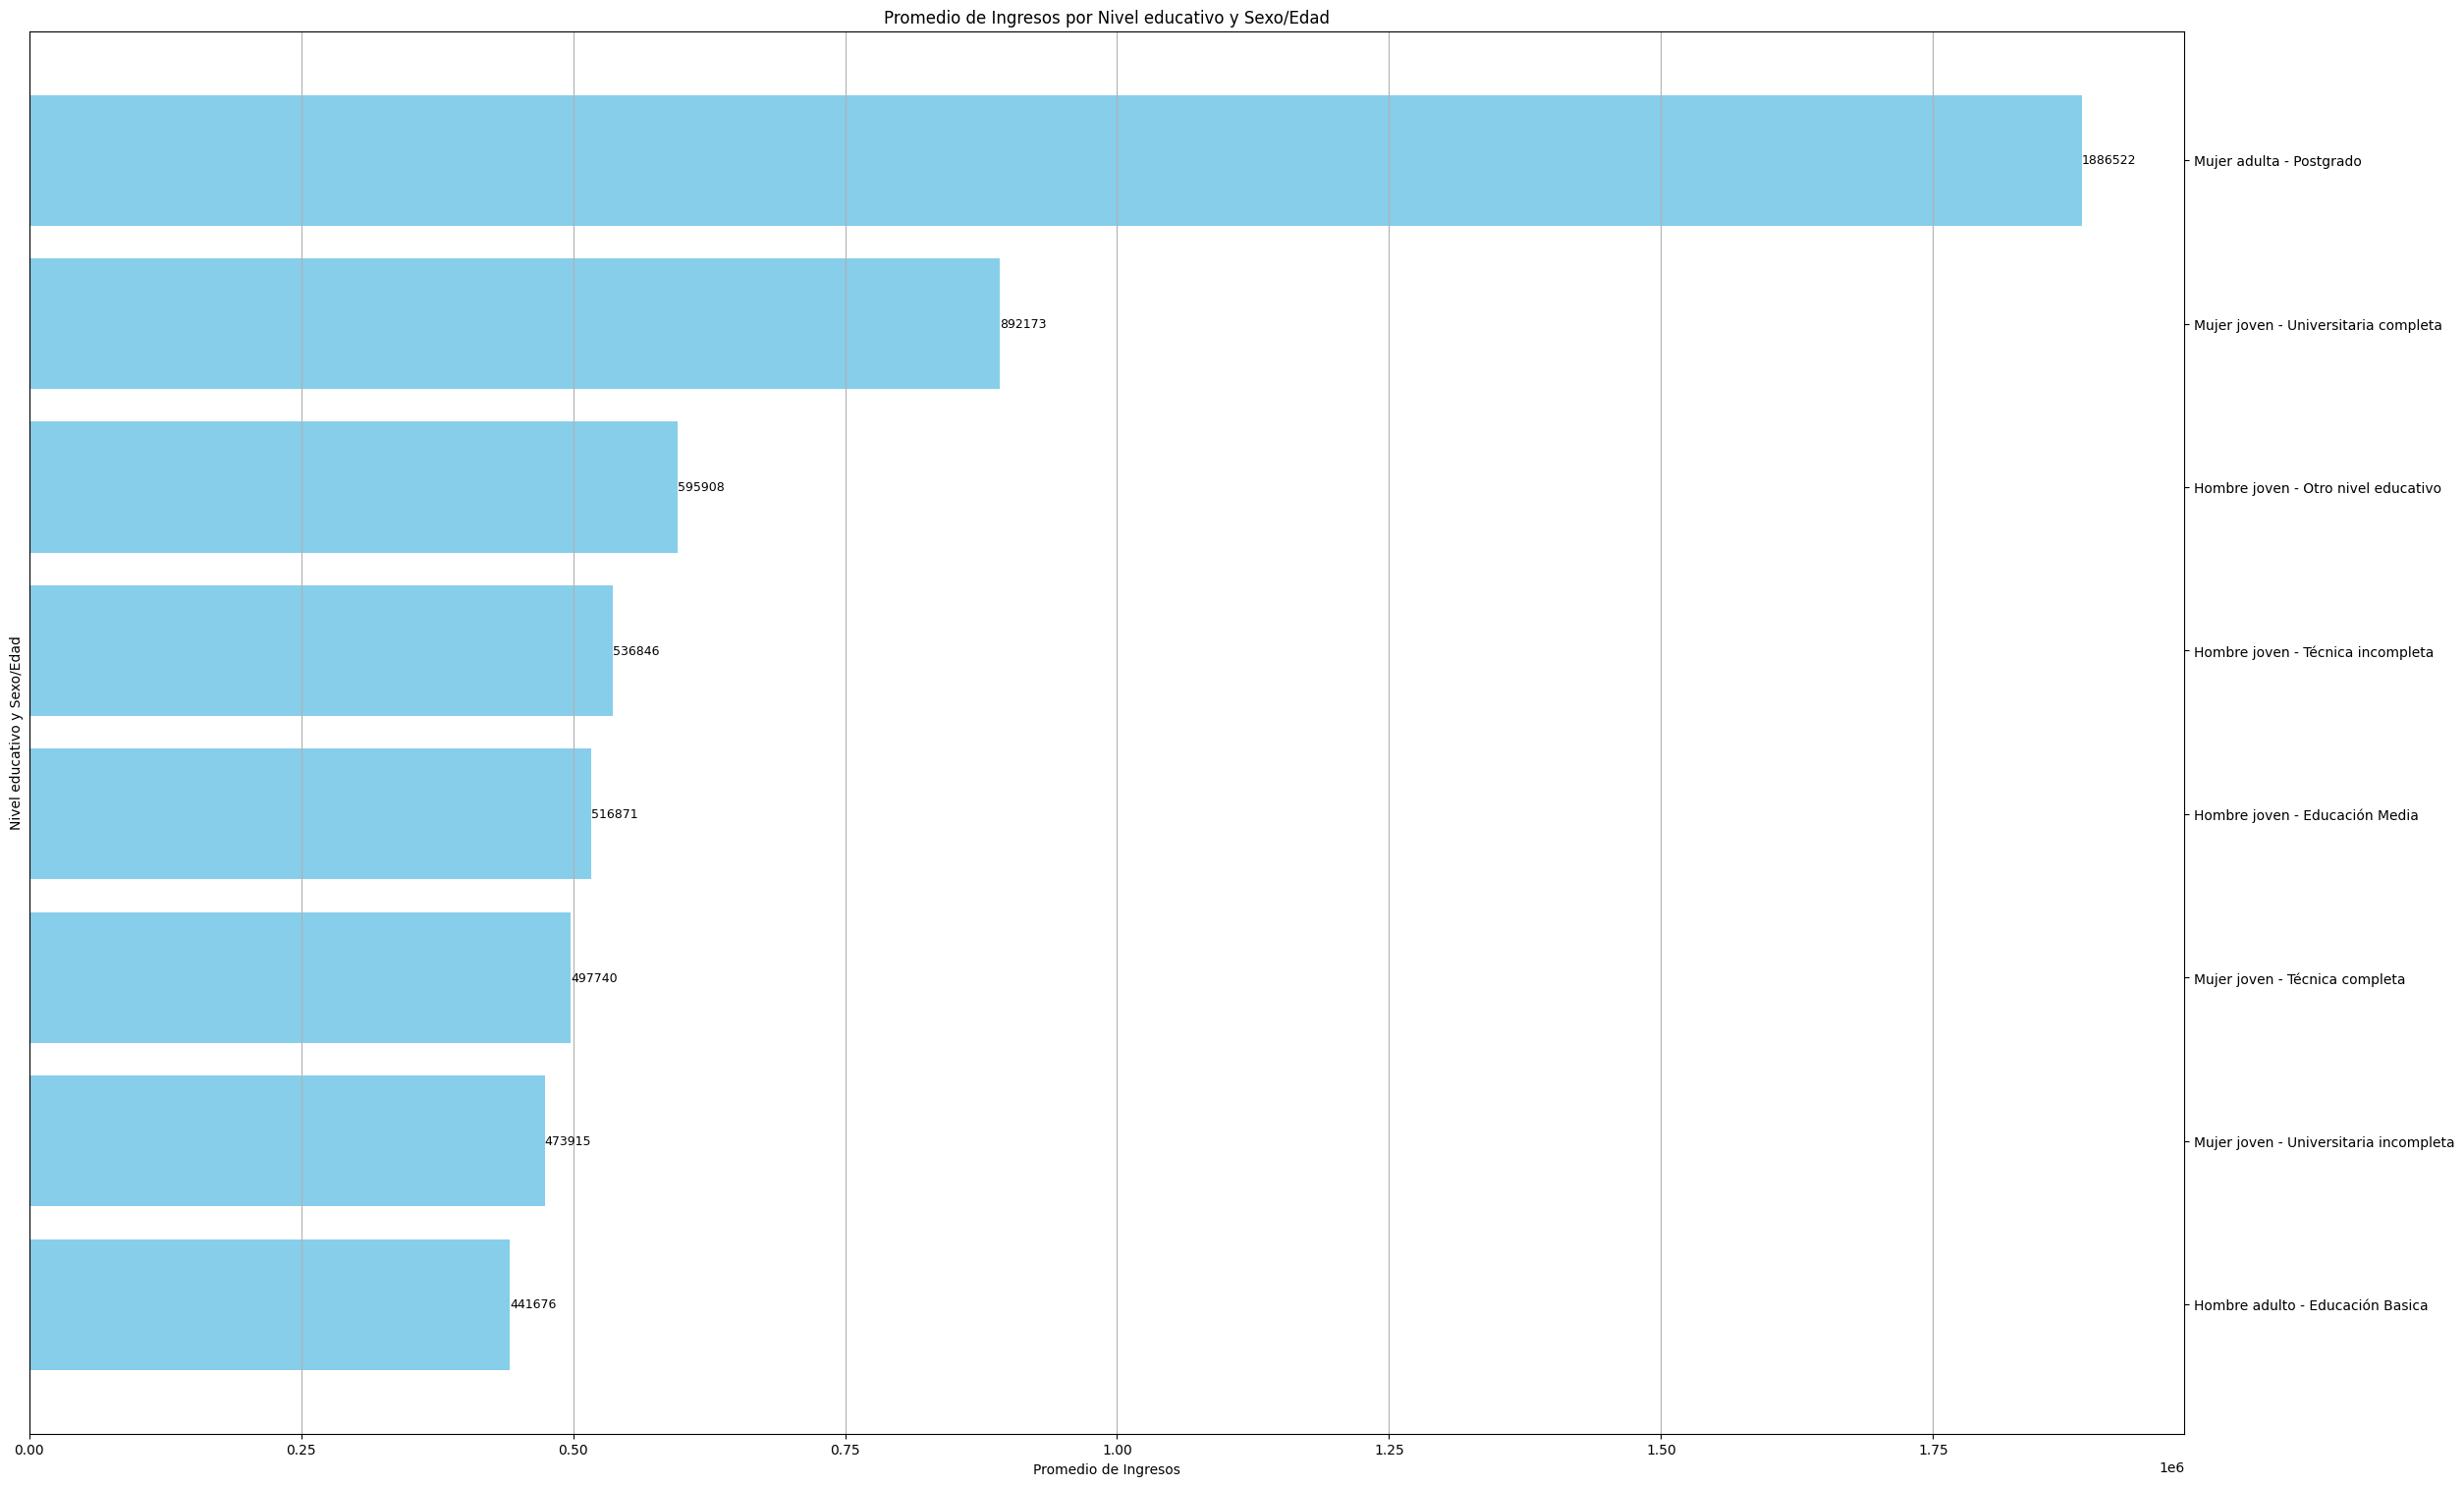

In [4]:
tabla['grupo'] = tabla['sexo_edad'] + ' - ' + tabla['educa']
tabla1 = tabla.sort_values(by='prom_ing_educa_sexo_edad', ascending=False)

plt.figure(figsize=(25, 15))
plt.barh(tabla1['grupo'], tabla1['prom_ing_educa_sexo_edad'], color='skyblue')
for index, value in enumerate(tabla1['prom_ing_educa_sexo_edad']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=9, color='k')
plt.tight_layout()
plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel educativo y Sexo/Edad')
plt.title('Promedio de Ingresos por Nivel educativo y Sexo/Edad')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.show()

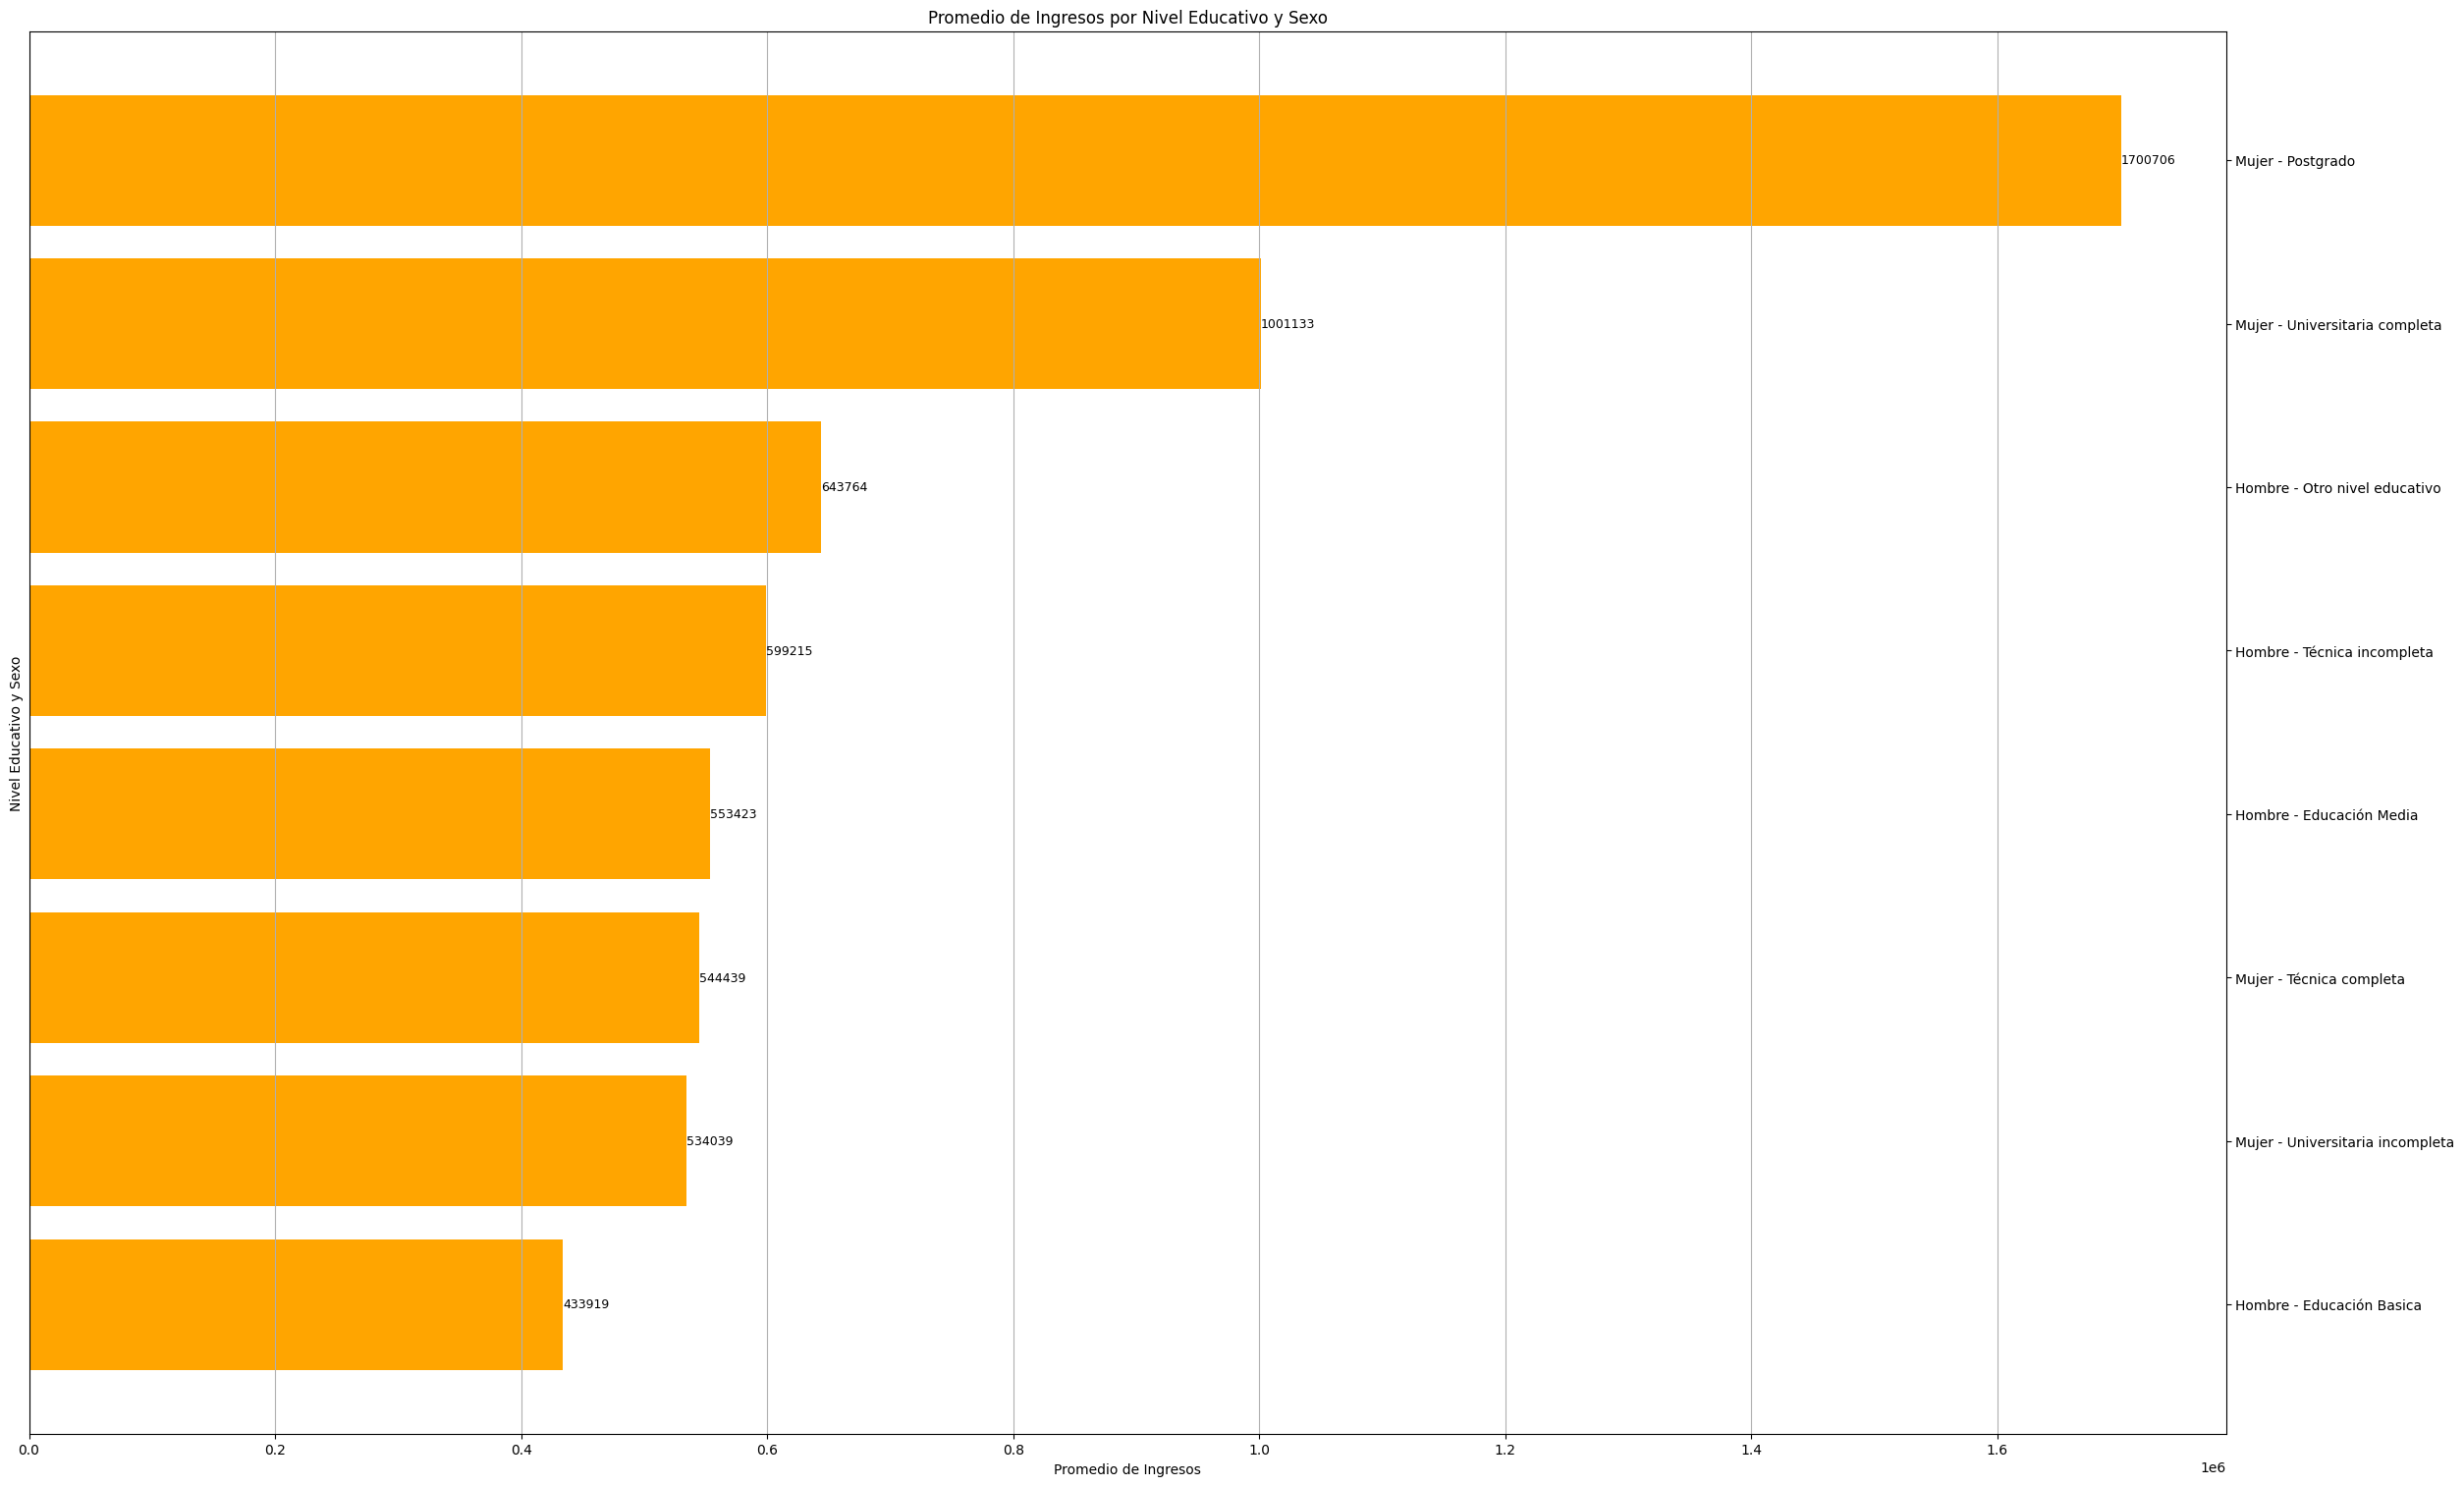

In [5]:
# Eliminar filas duplicadas en función de las columnas especificadas
tabla = tabla.drop_duplicates(subset=['prom_ing_educa', 'sexo_edad', 'educa', 'prom_ing_educa_sexo_edad', 'prom_ing_sexo_educa'])

# Crear una nueva columna 'grupo' combinando 'sexo' y 'educa'
tabla['grupo'] = tabla['sexo'] + ' - ' + tabla['educa']

# Ordenar el DataFrame por 'prom_ing_sexo_educa' de forma descendente
tabla1 = tabla.sort_values(by='prom_ing_sexo_educa', ascending=False)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(25, 15))
bars = plt.barh(tabla1['grupo'], tabla1['prom_ing_sexo_educa'], color='orange')

# Añadir etiquetas de texto para cada barra
for bar, value in zip(bars, tabla1['prom_ing_sexo_educa']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel Educativo y Sexo')
plt.title('Promedio de Ingresos por Nivel Educativo y Sexo')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.show()

In [6]:
data[['prom_ing_region', 'region']].value_counts()

prom_ing_region  region                          
841316           Región Metropolitana                12863
611597           Región de Valparaíso                 5870
588410           Región del Biobío                    5628
591856           Región de O'Higgins                  4503
501444           Región del Maule                     4129
529377           Región de La Araucanía               3183
585013           Región de Los Lagos                  3083
562386           Región de Los Ríos                   3020
776901           Región de Antofagasta                2685
687429           Región de Atacama                    2636
677874           Región de Tarapacá                   2383
625747           Región de Arica y Parinacota         2316
516164           Región de Ñuble                      2166
646876           Región de Coquimbo                   2129
763346           Región de Magallanes y Antártica     1845
785286           Región de Aysén                      1205
Name: 

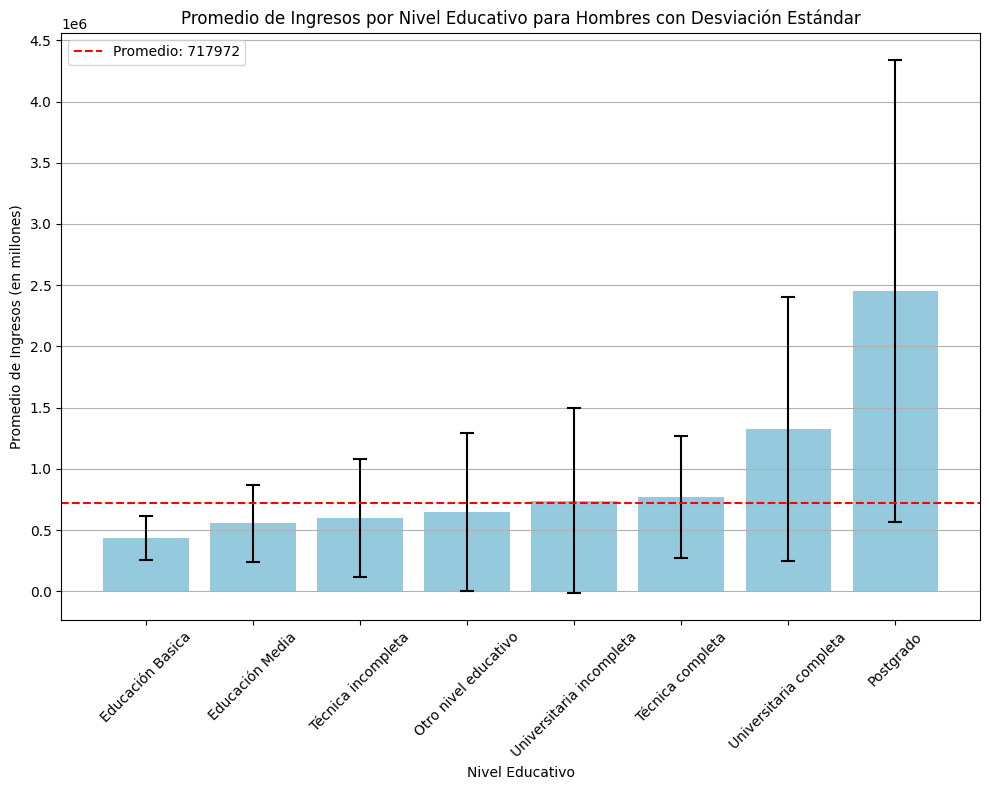

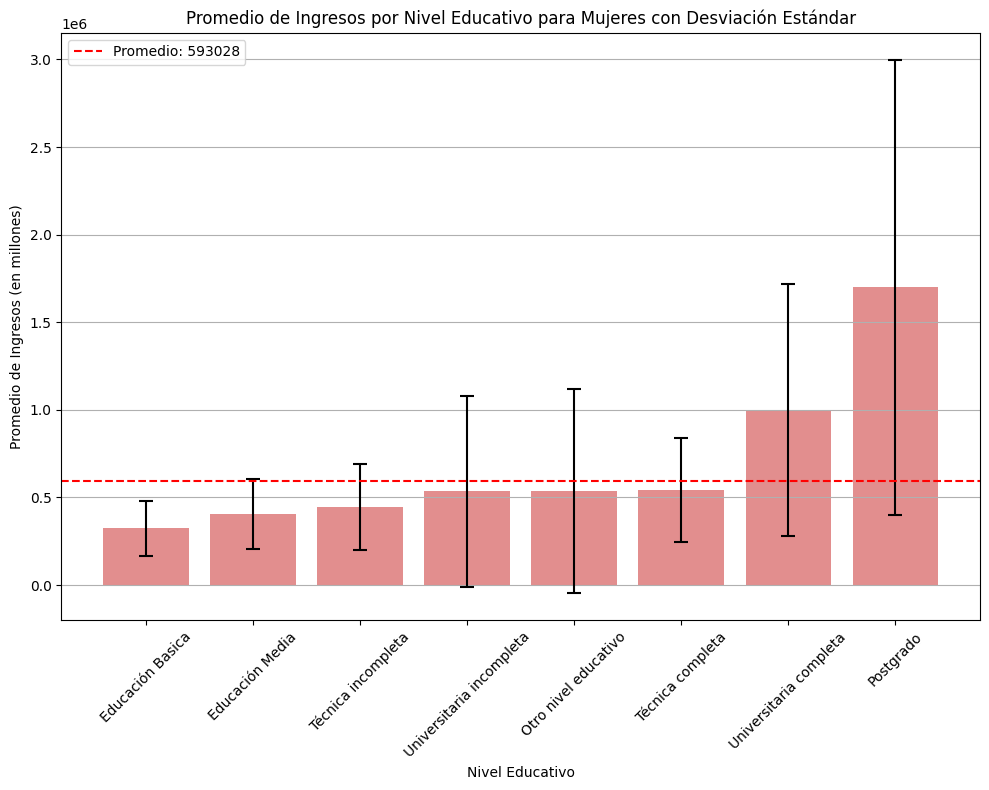

In [7]:
# Calcular la media y la desviación estándar
df = data.groupby(['sexo', 'educa']).agg(
     prom_ingreso=('ingreso', 'mean'),
     DE_ingreso=('ingreso', 'std')).reset_index()

hombres = df[df['sexo'] == 'Hombre'].sort_values(by='prom_ingreso', ascending=True)
mujeres = df[df['sexo'] == 'Mujer'].sort_values(by='prom_ingreso', ascending=True)

prom_h = data[data['sexo'] == 'Hombre']['ingreso'].mean()
prom_m = data[data['sexo'] == 'Mujer']['ingreso'].mean()

# Gráfico de hombres
plt.figure(figsize=(10, 8))
sns.barplot(data=hombres, 
            x='educa', 
            y='prom_ingreso', 
            color='skyblue',
            errorbar=None)

for i in range(len(hombres)):
    row = hombres.iloc[i]
    plt.errorbar(x=i, 
                 y=row['prom_ingreso'], 
                 yerr=row['DE_ingreso'], 
                 fmt='none', 
                 c='black', 
                 capsize=5,
                 capthick=1.5)
    
plt.axhline(y=prom_h, color='red', linestyle='--', label=f'Promedio: {prom_h:.0f}')

plt.yticks(range(0,4500001, 500000))
plt.xlabel('Nivel Educativo')
plt.ylabel('Promedio de Ingresos (en millones)')
plt.title('Promedio de Ingresos por Nivel Educativo para Hombres con Desviación Estándar')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngH_EducaDE.pdf')
plt.show()

print('\n\n')

# Gráfico de mujeres
plt.figure(figsize=(10, 8))
sns.barplot(data=mujeres, 
            x='educa', 
            y='prom_ingreso', 
            color='lightcoral',
            errorbar=None)

for i in range(len(mujeres)):
    row = mujeres.iloc[i]
    plt.errorbar(x=i, 
                 y=row['prom_ingreso'], 
                 yerr=row['DE_ingreso'], 
                 fmt='none', 
                 c='black', 
                 capsize=5,
                 capthick=1.5)

plt.axhline(y=prom_m, color='red', linestyle='--', label=f'Promedio: {prom_m:.0f}')

plt.yticks(range(0,3200001, 500000))
plt.xlabel('Nivel Educativo')
plt.ylabel('Promedio de Ingresos (en millones)')
plt.title('Promedio de Ingresos por Nivel Educativo para Mujeres con Desviación Estándar')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngM_EducaDE.pdf')
plt.show()

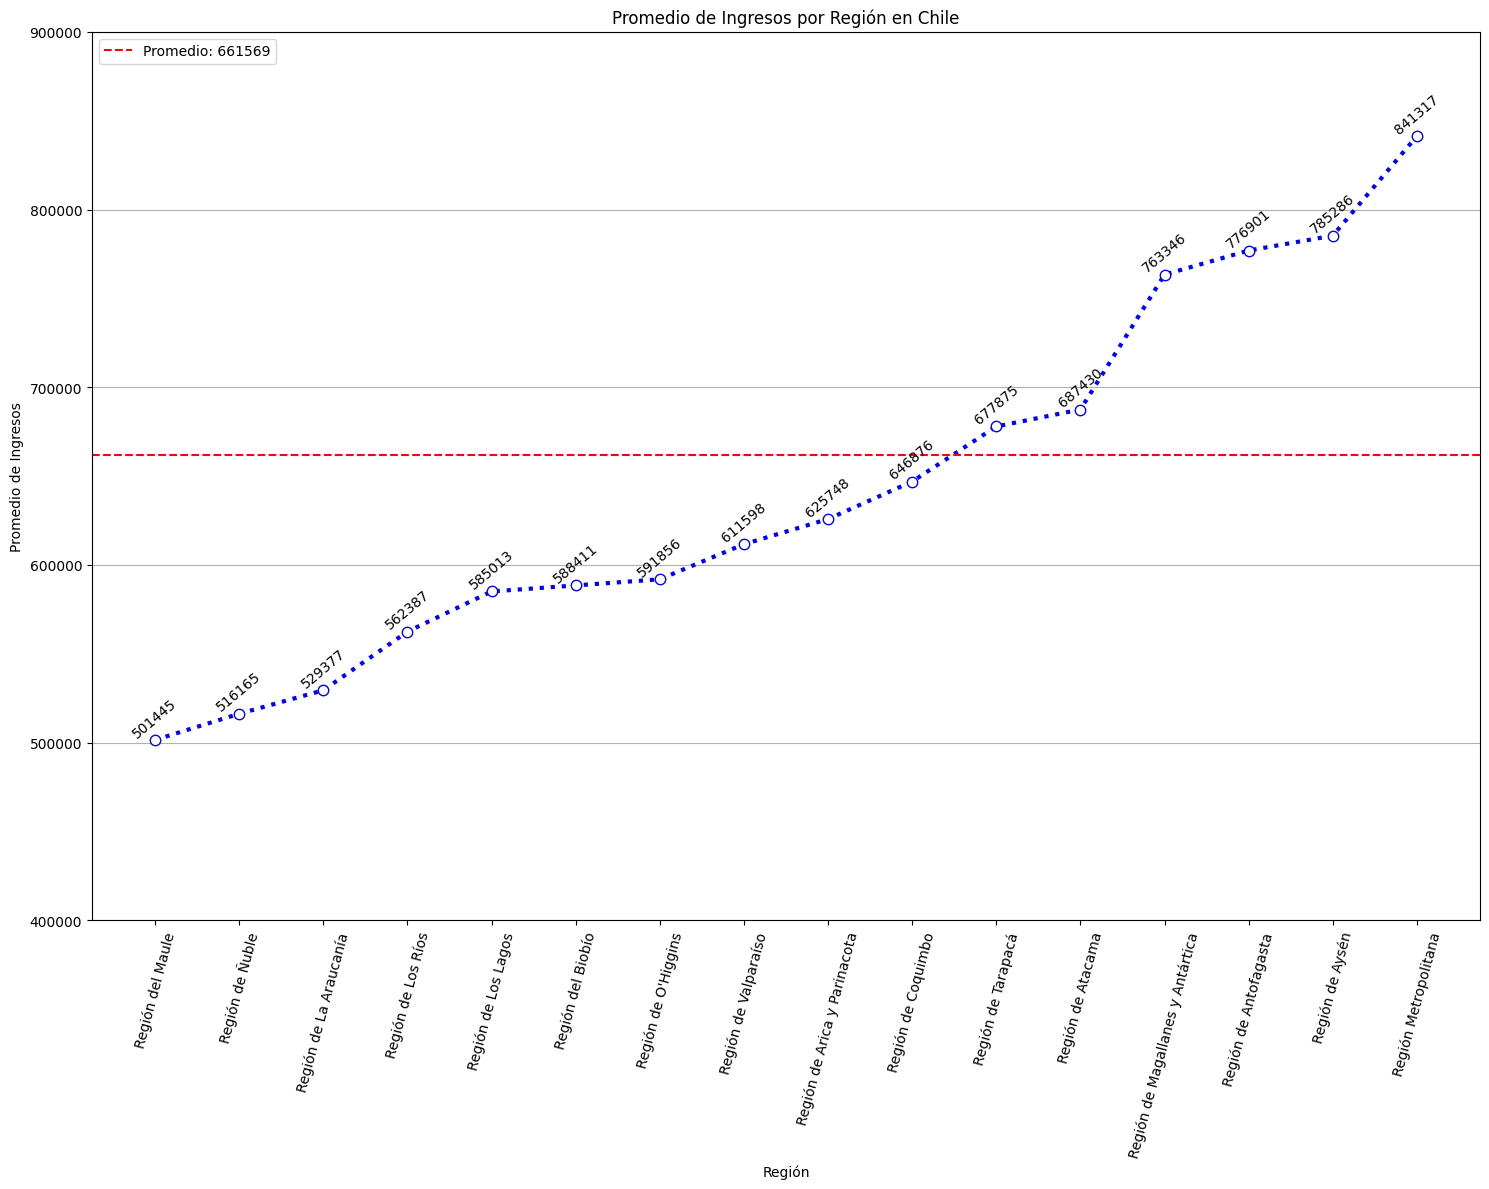

In [8]:
tabla = data[['region', 'ingreso']]
tabla = tabla.groupby('region').agg(
    prom_ing_region=('ingreso', 'mean')
).reset_index()
tabla = tabla.sort_values(by='prom_ing_region')

prom = data['ingreso'].mean()

plt.figure(figsize=(15, 12))
plt.plot(tabla['region'], tabla['prom_ing_region'], marker='o', linestyle=':', color='blue', linewidth=3, markersize=7.5, markerfacecolor='white')

for i in range(len(tabla)):
    plt.text(i, tabla.iloc[i]['prom_ing_region'], f"{tabla.iloc[i]['prom_ing_region']:.0f}", ha='center', va='bottom', rotation=40)

plt.axhline(y=prom, color='red', linestyle='--', label=f'Promedio: {prom:.0f}')

plt.yticks(range(400000, 900001, 100000))
plt.xlabel('Región')
plt.ylabel('Promedio de Ingresos')
plt.title('Promedio de Ingresos por Región en Chile')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngRegion.pdf')
plt.show()

C:\Users\criqu\AppData\Local\Temp\ipykernel_17224\2866200374.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mujeres['orden'] = mujeres['region'].map({region: idx for idx, region in enumerate(orden_regiones)})


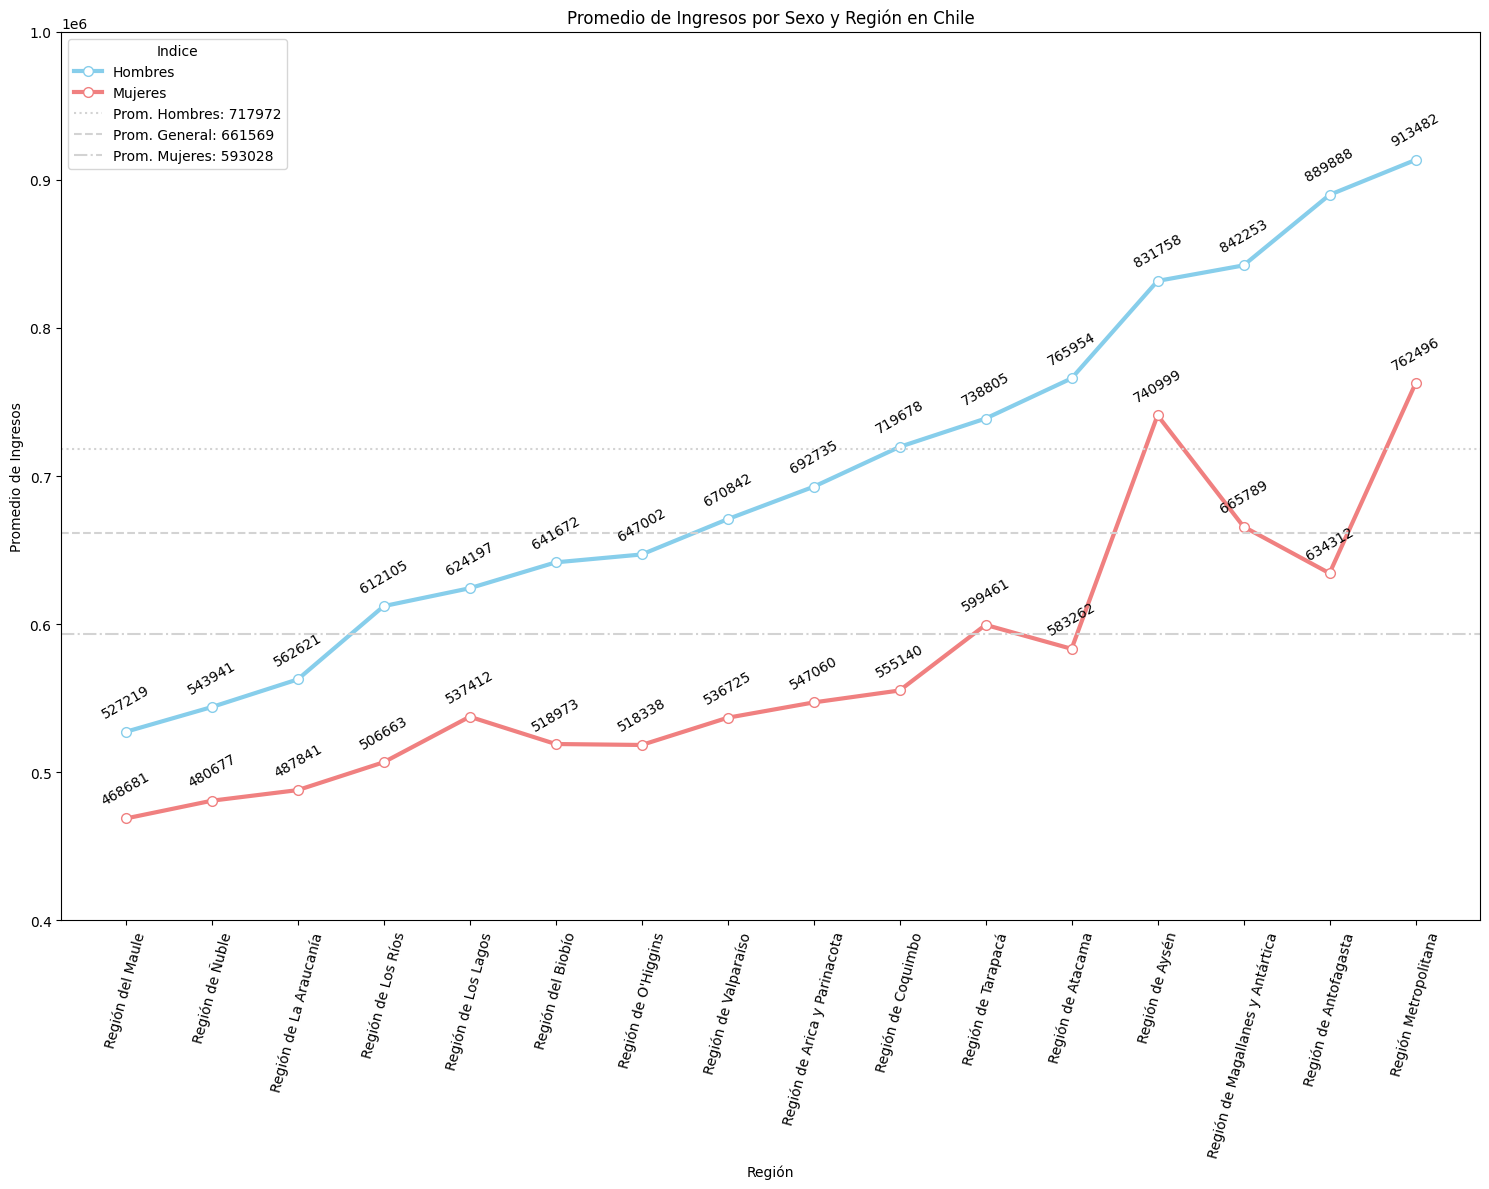

In [9]:
tabla = data[['region', 'sexo', 'ingreso']]
tabla = tabla.groupby(['sexo', 'region']).agg(
    prom_ing_sexo_region=('ingreso', 'mean')
).reset_index()


hombres = tabla[tabla['sexo'] == 'Hombre'].sort_values(by='prom_ing_sexo_region')
orden_regiones = hombres['region'].unique() 

mujeres = tabla[tabla['sexo'] == 'Mujer']
mujeres['orden'] = mujeres['region'].map({region: idx for idx, region in enumerate(orden_regiones)})
mujeres = mujeres.sort_values(by='orden')

prom_h = data[data['sexo'] == 'Hombre']['ingreso'].mean()
prom_m = data[data['sexo'] == 'Mujer']['ingreso'].mean()
prom = data['ingreso'].mean()

plt.figure(figsize=(15, 12))

plt.plot(hombres['region'], hombres['prom_ing_sexo_region'], label='Hombres', marker='o', color='skyblue', markerfacecolor='white', markersize=7, linewidth=3, linestyle='-')
for i in range(hombres.shape[0]):
    plt.annotate(f"{hombres['prom_ing_sexo_region'].iloc[i]:.0f}", 
                 (hombres['region'].iloc[i], hombres['prom_ing_sexo_region'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 rotation=30)

plt.plot(mujeres['region'], mujeres['prom_ing_sexo_region'], label='Mujeres', marker='o', color='lightcoral', markerfacecolor='white', markersize=7, linewidth=3, linestyle='-')
for i in range(mujeres.shape[0]):
    plt.annotate(f"{mujeres['prom_ing_sexo_region'].iloc[i]:.0f}", 
                 (mujeres['region'].iloc[i], mujeres['prom_ing_sexo_region'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 rotation=30)

plt.axhline(y=prom_h, color='lightgray', linestyle=':', label=f'Prom. Hombres: {prom_h:.0f}')
plt.axhline(y=prom, color='lightgray', linestyle='--', label=f'Prom. General: {prom:.0f}')
plt.axhline(y=prom_m, color='lightgray', linestyle='-.', label=f'Prom. Mujeres: {prom_m:.0f}')

plt.yticks(range(400000, 1000001, 100000))
plt.xlabel('Región')
plt.ylabel('Promedio de Ingresos')
plt.title('Promedio de Ingresos por Sexo y Región en Chile')
plt.xticks(range(len(orden_regiones)), orden_regiones, rotation=75)
plt.legend(title='Indice', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngSexoRegion.pdf')
plt.show()

C:\Users\criqu\AppData\Local\Temp\ipykernel_17224\1657467255.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


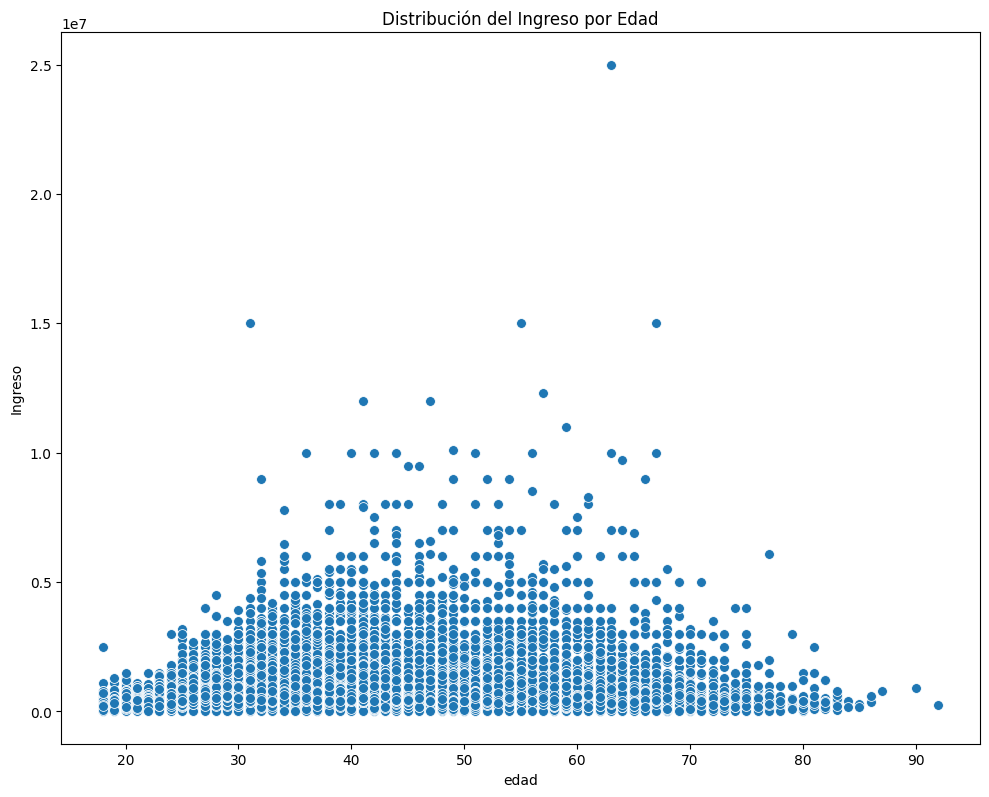

In [10]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=data,
    x='edad',
    y='ingreso',
    palette='muted',
    s=50  
)

plt.tight_layout()
plt.xlabel('edad')
plt.ylabel('Ingreso')
plt.title('Distribución del Ingreso por Edad')
plt.savefig('../output/fig/DistIngEdad.pdf')
plt.show()

c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


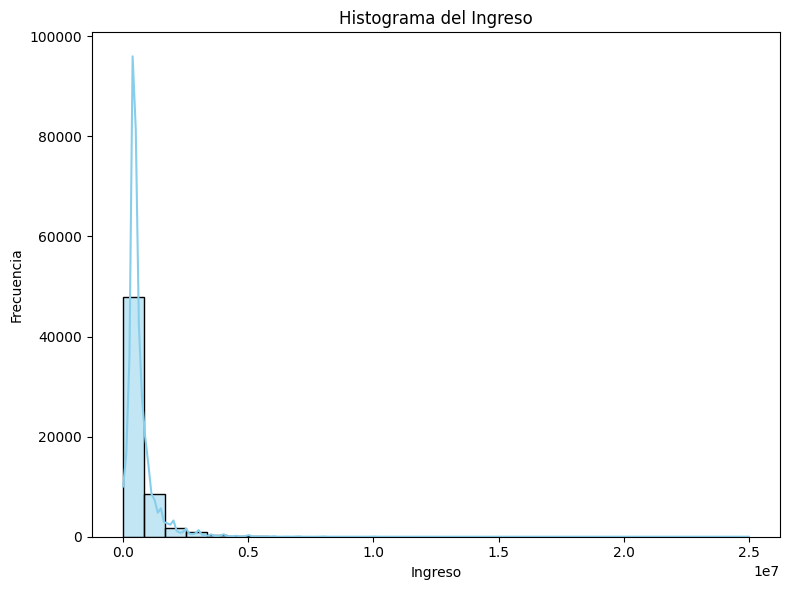

c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

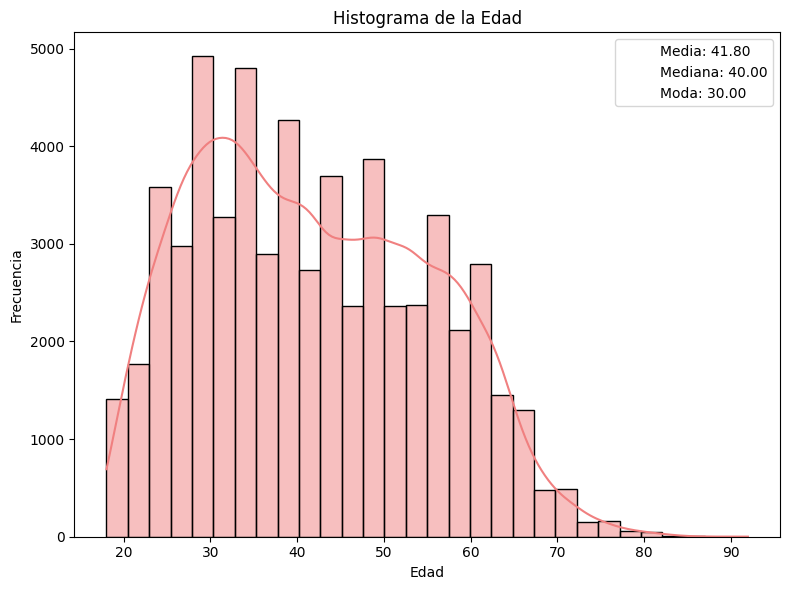

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(data['ingreso'], bins=30, kde=True, color='skyblue')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Histograma del Ingreso')
plt.tight_layout()
plt.savefig('../output/fig/HistoIngreso.pdf')
plt.show()

plt.tight_layout()
media = data['edad'].mean()
mediana = data['edad'].median()
moda = data['edad'].mode()[0]
plt.figure(figsize=(8,6))
sns.histplot(data['edad'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad')

handles = [
    plt.Line2D([0], [0], color='none', label=f'Media: {media:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Mediana: {mediana:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Moda: {moda:.2f}')
]
plt.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.savefig('../output/fig/HistoEdad.pdf')
plt.show()

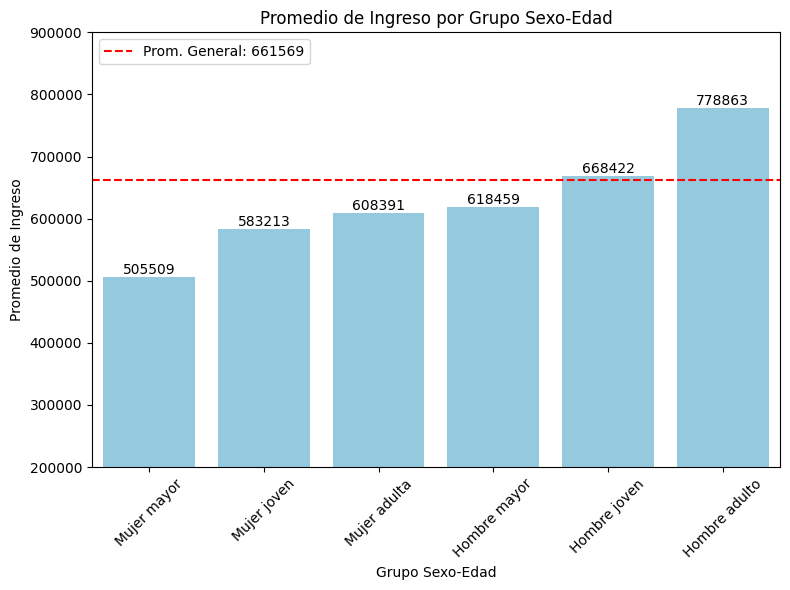

In [12]:
tabla = (data.drop_duplicates(subset=['sexo_edad', 'prom_ing_sexo_edad'])).sort_values(by='prom_ing_sexo_edad', ascending=True)

plt.figure(figsize=(8,6))
bar_plot = sns.barplot(
    data=tabla,
    x='sexo_edad',
    y='prom_ing_sexo_edad',
    color='skyblue',
)
prom = data['ingreso'].mean()

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

plt.axhline(y=prom, color='red', linestyle='--', label=f'Prom. General: {prom:.0f}')

plt.ylim(200000, 900000)
plt.xlabel('Grupo Sexo-Edad')
plt.ylabel('Promedio de Ingreso')
plt.title('Promedio de Ingreso por Grupo Sexo-Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='', loc='upper left')
plt.savefig('../output/fig/PromIngSexoEdad.pdf')
plt.show()

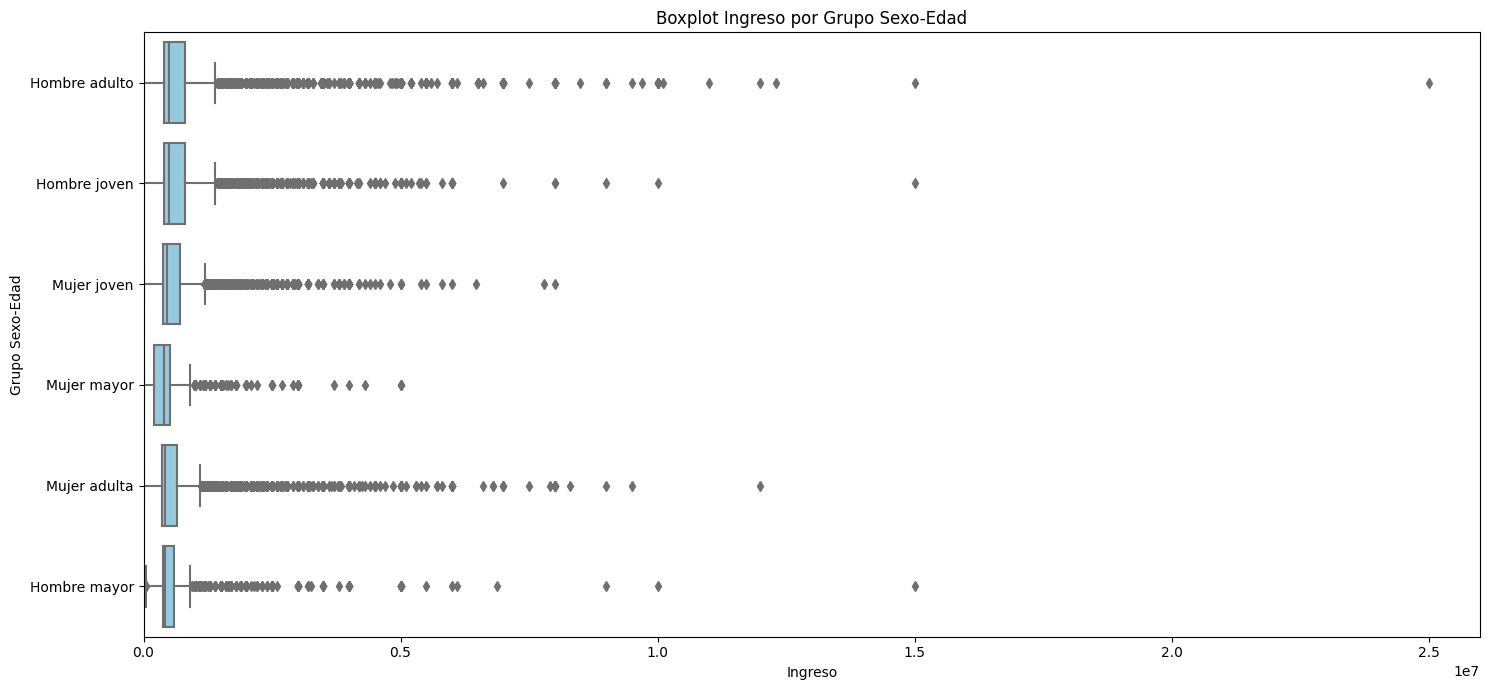

In [13]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    data=data,
    y='sexo_edad',  
    x='ingreso',   
    color='skyblue',
    orient='h' 
)

plt.xlim(0, 26000000) 
plt.ylabel('Grupo Sexo-Edad') 
plt.xlabel('Ingreso')
plt.title('Boxplot Ingreso por Grupo Sexo-Edad')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.savefig('../output/fig/BoxIngSexoEdad.pdf')
plt.show()

In [14]:
data['ingreso'].describe()

count    5.964400e+04
mean     6.615691e+05
std      6.457663e+05
min      0.000000e+00
25%      4.000000e+05
50%      4.900000e+05
75%      7.500000e+05
max      2.500000e+07
Name: ingreso, dtype: float64

In [15]:
data['edad'].describe()

count    59644.000000
mean        41.803350
std         13.363736
min         18.000000
25%         31.000000
50%         40.000000
75%         52.000000
max         92.000000
Name: edad, dtype: float64

c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


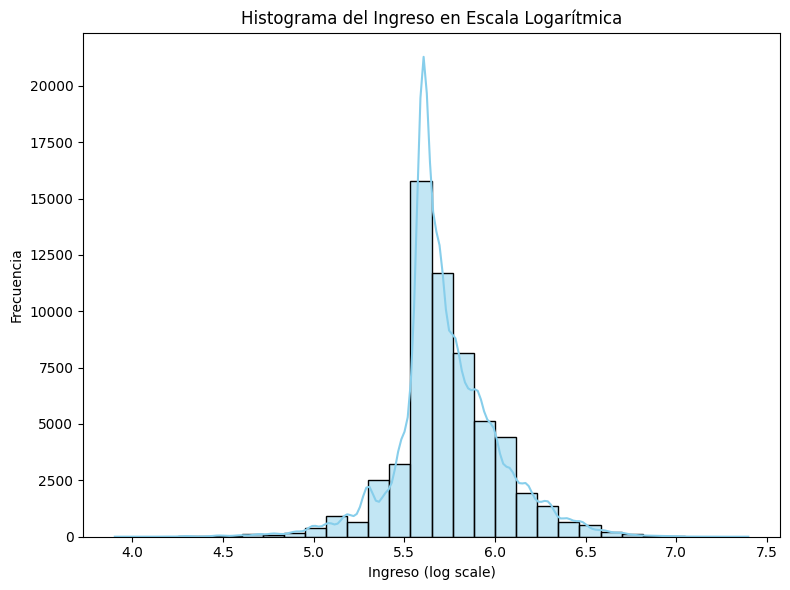

In [16]:
ingresos = data['ingreso']

plt.figure(figsize=(8, 6))

sns.histplot(np.log10(ingresos), bins=30, kde=True, color='skyblue')

plt.xlabel('Ingreso (log scale)')
plt.ylabel('Frecuencia')
plt.title('Histograma del Ingreso en Escala Logarítmica')
plt.tight_layout()

# plt.savefig('../output/fig/HistoIng_loglog.pdf')
plt.show()

c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\criqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


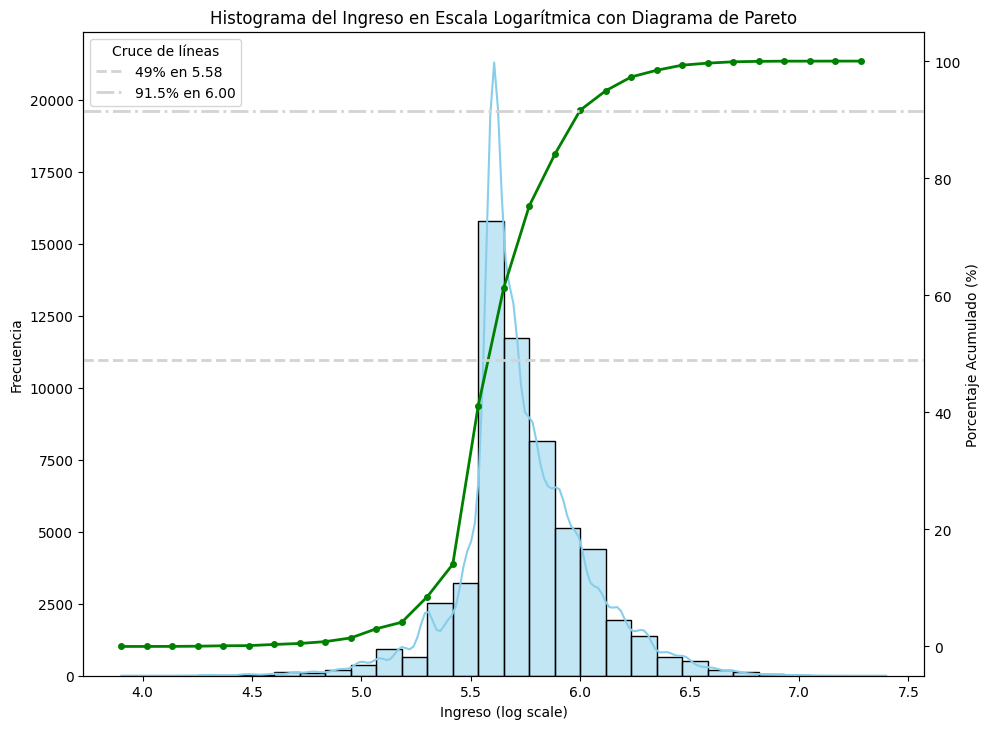

In [17]:
ingresos = np.log10(data['ingreso'])
ingresos = ingresos[ingresos > 0]

hist, bins = np.histogram(ingresos, bins=30)
hist = hist / hist.sum() 
cumulative_hist = np.cumsum(hist)

fig, ax1 = plt.subplots(figsize=(10, 7.4))

sns.histplot(ingresos, bins=30, kde=True, color='skyblue', ax=ax1)

ax1.set_xlabel('Ingreso (log scale)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histograma del Ingreso en Escala Logarítmica con Diagrama de Pareto')

ax2 = ax1.twinx()
ax2.plot(bins[:-1], cumulative_hist * 100, color='green', linestyle='-', marker='o', markersize=4, linewidth=2)

ax2.set_ylabel('Porcentaje Acumulado (%)')

porc1 = 49 
porc2 = 91.5

val_porc1 = np.interp(porc1 / 100, cumulative_hist, bins[:-1])
ax2.axhline(y=porc1, color='lightgray', linestyle='--', linewidth=2)
# ax2.axvline(x=val_porc1, color='gray', linestyle='--', linewidth=2)

val_porc2 = np.interp(porc2 / 100, cumulative_hist, bins[:-1])
ax2.axhline(y=porc2, color='lightgray', linestyle='-.', linewidth=2)
# ax2.axvline(x=val_porc2, color='gray', linestyle='--', linewidth=2)

line_fantom1 = plt.Line2D([], [], color='lightgray', linestyle='--', linewidth=2, label=f'{porc1}% en {val_porc1:.2f}')
line_fantom2 = plt.Line2D([], [], color='lightgray', linestyle='-.', linewidth=2, label=f'{porc2}% en {val_porc2:.2f}')

plt.legend(handles=[line_fantom1, line_fantom2], loc='upper left', title='Cruce de líneas')

plt.tight_layout()
plt.savefig('../output/fig/HistoIng_loglogPareto.pdf')
plt.show()